In [56]:
import numpy as np
import pandas as pd
import yfinance as yf #for stock data
from IPython.display import display #for displaying the full dataframes
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for advanced data visualization
import datetime 
from sklearn import preprocessing #for ML models and data processing
import itertools  #advanced tools for loops


%matplotlib inline



In [57]:
dt = pd.read_excel (r'data_clean.xlsx')

In [58]:
type(dt['Exit Time'][0])


str

In [59]:
#1)
dt.isna().sum()

Unnamed: 0                        0
Instrument                        0
Entry Date                        0
Entry Time                        0
Exit Time                         0
Intended Entry                    0
Entry Price                       0
SL Price                          0
Exit Price                        0
Highest Price                     0
Potential Price                   0
Volume Exit                       0
Wick Exit                         0
Price Behaviour                   0
Sector                            0
Catalyst                          5
Pattern                           0
Float                             3
RRR in-trade                      0
Negative RRR in-trade             0
Time                              0
Outcome                           0
Missed RRR on Entry               0
Missed RRR                        0
RRR Potential                     0
Hard RRR Potential                0
RRR Difference                    0
RRR Realized                

In [60]:
#2)
dt.dtypes

Unnamed: 0                                 int64
Instrument                                object
Entry Date                        datetime64[ns]
Entry Time                                object
Exit Time                                 object
Intended Entry                           float64
Entry Price                              float64
SL Price                                 float64
Exit Price                               float64
Highest Price                            float64
Potential Price                          float64
Volume Exit                              float64
Wick Exit                                float64
Price Behaviour                           object
Sector                                    object
Catalyst                                  object
Pattern                                   object
Float                                    float64
RRR in-trade                             float64
Negative RRR in-trade                    float64
Time                

In [61]:
#3)

dt.describe()


,Unnamed: 0,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,Potential Price,Volume Exit,Wick Exit,Float,...,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,RRR Volume Exit,RRR Wick Exit,RRR Joint Wick and Volume Exit,Table Number
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,147.000000,...,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,4.584267,4.586667,4.443667,4.617333,4.802933,5.150200,2.157000,0.622200,67.179932,...,0.01620,0.276400,3.209867,3.225933,3.029733,0.180200,0.461000,0.284533,0.519067,0.566667
std,43.445368,3.459724,3.459923,3.370544,3.555130,3.620512,5.744752,3.892333,1.891822,199.382760,...,0.10707,0.480611,4.832484,4.844399,3.913244,2.017635,2.547893,1.924035,2.476476,0.689486
min,0.000000,0.290000,0.290000,0.260000,0.270000,0.310000,0.310000,0.000000,0.000000,0.040000,...,-0.33000,-0.480000,-0.050000,-0.330000,0.000000,-2.730000,-2.670000,-2.670000,-2.670000,0.000000
25%,37.250000,2.045000,2.045000,1.955000,1.940000,2.087500,2.202500,0.000000,0.000000,3.660000,...,-0.01000,0.000000,0.632500,0.585000,1.357500,-1.320000,-1.135000,-1.087500,-1.027500,0.000000
50%,74.500000,3.520000,3.520000,3.460000,3.920000,4.035000,4.040000,0.000000,0.000000,10.650000,...,0.00000,0.035000,1.645000,1.635000,2.225000,-0.860000,-0.215000,-0.295000,-0.035000,0.000000
75%,111.750000,6.935000,6.935000,6.792500,6.920000,7.215000,7.215000,3.585000,0.000000,37.695000,...,0.05750,0.330000,4.215000,4.327500,3.292500,2.715000,1.415000,2.652500,1.387500,1.000000
max,149.000000,25.880000,25.880000,25.030000,28.820000,28.820000,64.000000,32.970000,11.120000,1490.000000,...,0.33000,1.730000,44.850000,44.850000,41.390000,3.500000,10.200000,3.500000,10.200000,3.000000


In [62]:
dt.describe(include='all')  

,Unnamed: 0,Instrument,Entry Date,Entry Time,Exit Time,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,...,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,RRR Volume Exit,RRR Wick Exit,RRR Joint Wick and Volume Exit,Table Number
count,150.000000,150,150,150,150,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
unique,NaN,107,79,69,76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,BPTH,2019-05-15 00:00:00,10:06:00,10:07:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,6,7,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2018-12-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,74.500000,NaN,NaN,NaN,NaN,4.584267,4.586667,4.443667,4.617333,4.802933,...,0.01620,0.276400,3.209867,3.225933,3.029733,0.180200,0.461000,0.284533,0.519067,0.566667
std,43.445368,NaN,NaN,NaN,NaN,3.459724,3.459923,3.370544,3.555130,3.620512,...,0.10707,0.480611,4.832484,4.844399,3.913244,2.017635,2.547893,1.924035,2.476476,0.689486
min,0.000000,NaN,NaN,NaN,NaN,0.290000,0.290000,0.260000,0.270000,0.310000,...,-0.33000,-0.480000,-0.050000,-0.330000,0.000000,-2.730000,-2.670000,-2.670000,-2.670000,0.000000
25%,37.250000,NaN,NaN,NaN,NaN,2.045000,2.045000,1.955000,1.940000,2.087500,...,-0.01000,0.000000,0.632500,0.585000,1.357500,-1.320000,-1.135000,-1.087500,-1.027500,0.000000


### In this stage we will focus on 2 things:
#### 1) Find flaws

#### 2) Find outliers



### Unusual Dates:

In [63]:

#unusual Dates

#change date formet to Y-M-D
dt['Entry Date']=pd.to_datetime(dt['Entry Date'], errors='coerce').dt.date

#find dates that are invalid and add them to unusual_dates, for example 2017-2-33 would be invalid
#also finds dates that are outside the expected range, 2018/12/13 to 2020/2/5 and adds them to unusual_dates
unusual_dates=[]
def is_date_valid(d):
    try:
        da = datetime.date(int(d.year),int(d.month),int(d.day))
        if da<datetime.date(2018,12,12) and da>datetime.date(2020,5,2):
            unusual_dates.append(d)
            print(d)
    except ValueError:
        unusual_dates.append(d)
        print(d)
        

dt['Entry Date'].apply(is_date_valid)


print("number of unusual dates: %d"%len(unusual_dates))

unusual_dates


number of unusual dates: 0


[]

### Unusual Time:

In [64]:

#Unusual time: all trades consist of only long trades, thus the 'Entry Time' needs to be after or equal to 'Exit Time'
#all trades were opened between 9:30 and closed the latest at 16:30 (market close) that same day.

# change the type from string to datetime.time
dt['Entry Time'] = dt['Entry Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time())
dt['Exit Time'] = dt['Exit Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time())
dt['Time'] = dt['Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time())

unusual_execution = dt[(dt['Entry Time'] > dt['Exit Time']) | (dt['Entry Time']<datetime.time(9, 30)) |(dt['Exit Time']>datetime.time(16, 30))]

unusual_length = dt[dt['Time']>datetime.time(8,30,0)]    

unusual_time = unusual_execution.append(unusual_length)

print("Number of rows with unusual time: %d" % (len(unusual_time)))

unusual_time


Number of rows with unusual time: 0


,Unnamed: 0,Instrument,Entry Date,Entry Time,Exit Time,Intended Entry,Entry Price,SL Price,Exit Price,Highest Price,...,Missed RRR on Entry,Missed RRR,RRR Potential,Hard RRR Potential,RRR Difference,RRR Realized,RRR Volume Exit,RRR Wick Exit,RRR Joint Wick and Volume Exit,Table Number


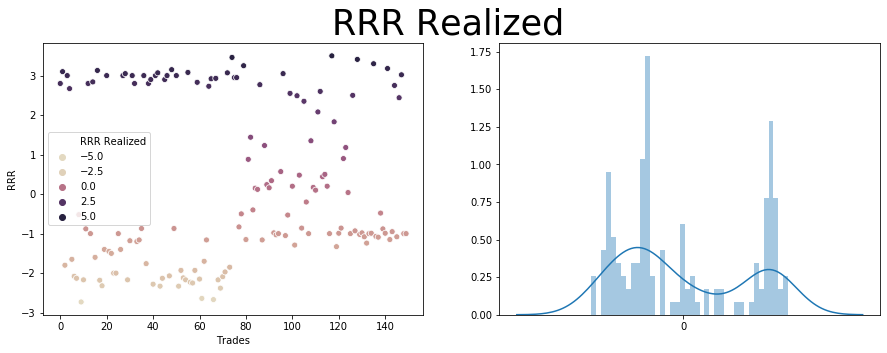

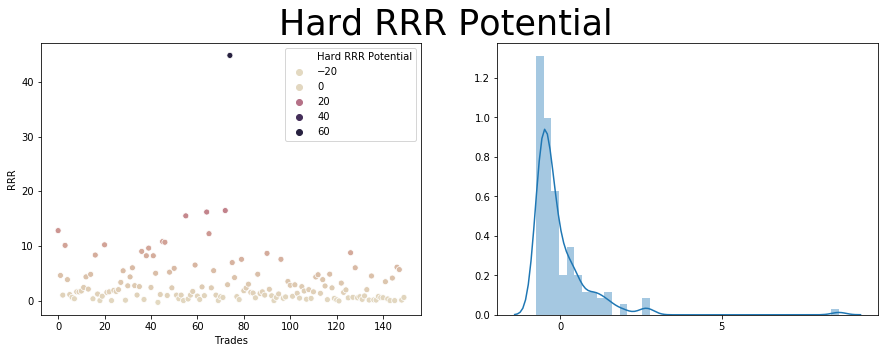

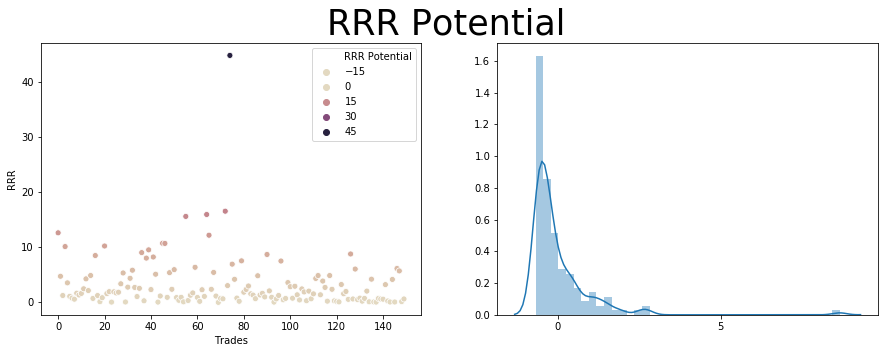

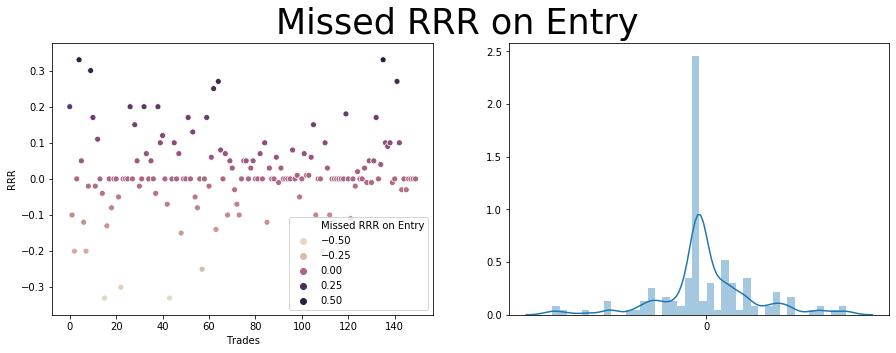

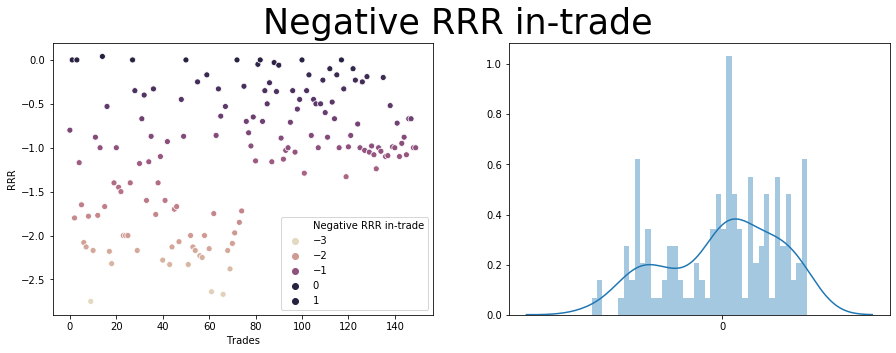

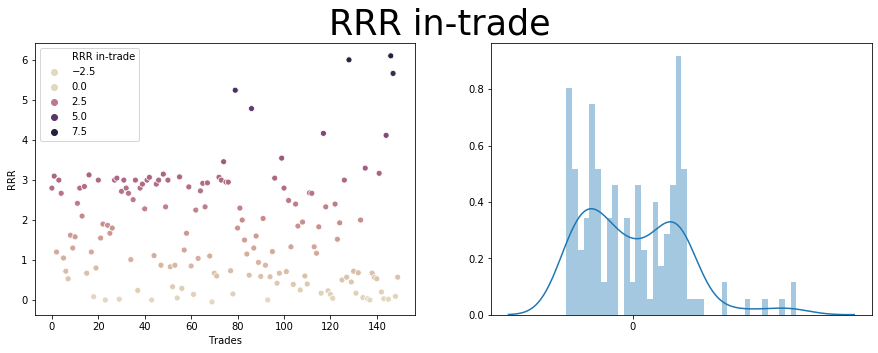

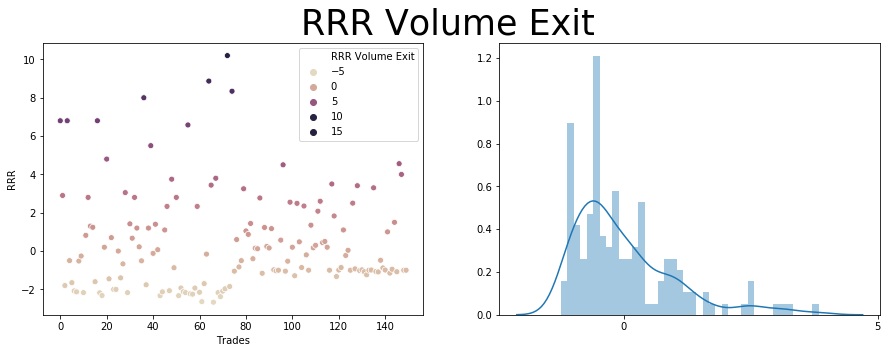

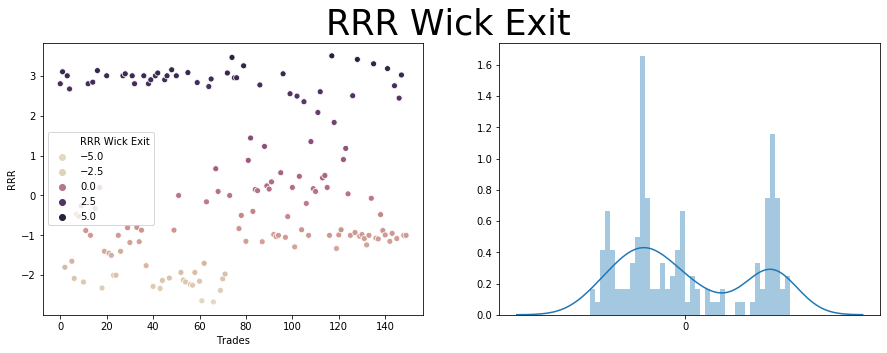

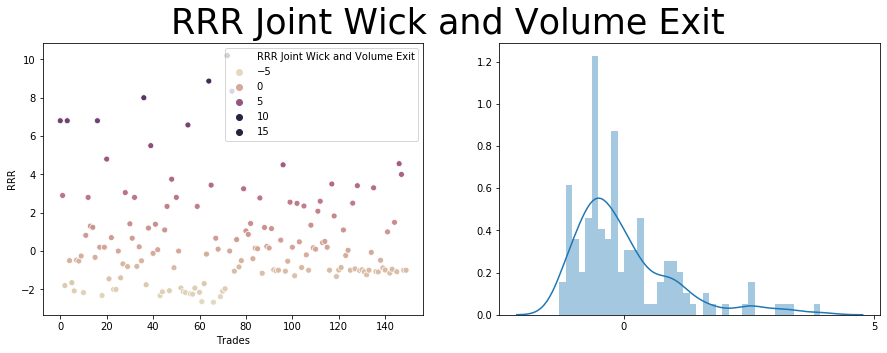

In [65]:
#3)To Find faulty rows of 'Intended Entry', 'SL Price', 'Highest Price' and 'Potential Price' I will check for outliers:


#Plotting function
#Arguments: column = the column from dt, column_title = columns title, color = any given matplotlib plotting color

scaler = preprocessing.StandardScaler()
def plotter (column,column_title):
    
    x= np.arange(len(column))  

    
    fig, ax =plt.subplots(1,2 ,figsize = (15,5))
    fig.suptitle(column_title, size =35)
    sns.scatterplot(x,column, ax = ax[0], hue=column ,palette = "ch:s=-.2,r=.6")   
    plt.xticks(np.arange(0, len(column), step=5))   
    s= column.to_numpy().reshape(len(column),1)
    standardized = scaler.fit_transform(s)
    sns.distplot(standardized, bins = 40,ax = ax[1] )
    plt.setp(ax[0], xlabel='Trades' , ylabel = "RRR")
    #plt.setp(ax[1], xlabel='Trades' , ylabel = "Standardized RRR")

    
RRR = ['RRR Realized','Hard RRR Potential','RRR Potential','Missed RRR on Entry','Negative RRR in-trade','RRR in-trade','RRR Volume Exit','RRR Wick Exit','RRR Joint Wick and Volume Exit']

for column in RRR:
    plotter(dt[column] ,column )

In [66]:
#1)
#'RRR in-trade' ourliers, RRR above 4 (4 as a benchmark)
outliers1 = dt[dt['RRR in-trade']>4]

#2)
#'RRR in-trade' ourliers, RRR below 0 (needs to be positive or slightly negative)
outliers2 = dt[dt['RRR in-trade']<0]

#3)
# 'RRR Potential' outliers, RRR above 20 (20 as a benchmark)
outliers3 = dt[dt['RRR Potential']>20]

#4)
# 'Negative RRR in-trade', RRR above 0 (needs to be negative only)
outliers4 = dt[dt['Negative RRR in-trade']>0]

print('outliers1 length: %d \noutliers2 length: %d \noutliers3 length: %d \noutliers4 length: %d'%(len(outliers1),len(outliers2),len(outliers3),len(outliers4)))

outliers =  outliers1.append(outliers2).append(outliers3).append(outliers4)
outliers[['Instrument','RRR in-trade','RRR Potential','Negative RRR in-trade']]

outliers1 length: 7 
outliers2 length: 1 
outliers3 length: 1 
outliers4 length: 1


,Instrument,RRR in-trade,RRR Potential,Negative RRR in-trade
79,SLNO,5.25,7.50,-0.65
86,PLAG,4.79,4.79,-0.26
117,NBY,4.17,4.83,0.00
128,OTLK,6.01,6.01,-0.19
144,OBLN,4.12,4.12,-0.88
146,DPW,6.11,6.11,-0.67
147,ROYT,5.67,5.67,-0.67
69,CIFS,-0.05,-0.05,-2.38
74,BPTH,3.46,44.85,-1.72
14,UXIN,2.84,4.84,0.04


We can see some outliers within 'RRR Potential','RRR in-trade' and 'Negative RRR in-trade',I obsereved each one separately therefore will act on each one accordingly.

1) 
I chose to leave the ones in 'RRR in-trade' untoched for several reasons:
- The data with 'RRR in-trade' above 4 is valid, meaning all observation are accurate.
- Their relative outlier significance is quite small.
- They hold valuable information for better trade selection in the future, in-fact they are the "gold-nuggets" of this strategy.
Example:

2)
Even though 'RRR in-trade' needs to be a positive value, this outlier is due to positive slippage.
Slippage refers to the difference between the expected price of a trade and the price at which the trade is executed.
Since its value is only 0.04 and isn't significant compared to the rest I decided to round it down to 0.


3)
After observing the outlier, the data and the trades screenshot that represets it I decided to drop the row. 

4)
Even though 'Negative RRR in-trade' needs to be a negative value, this one outlier is due to positive slippage.
Since its value is only 0.04 and isn't significant compared to the rest I decided to round it down to 0.

5) 
The rest seem to have reasonable distribution, therfore I left them untouched.


Note: the instances mentioned above are only a visible fracture of the corrections made, most of the corrections were done locally due to their interactiveness betweens cells with excel functions.


In [67]:
# drop the row in outlier2 from dt
dt =  dt[dt['RRR Potential']<=20].reset_index(drop=True)

#roundup the value from outlier2 to 0
dt['Negative RRR in-trade'].apply(lambda x: 0 if x<0 else x)

# rounddown the value from outlier3 to 0
dt['Negative RRR in-trade'].apply(lambda x: 0 if x>0 else x)

0     -0.80
1      0.00
2     -1.80
3      0.00
4     -1.17
       ... 
144   -1.08
145   -0.67
146   -0.67
147   -1.00
148   -1.00
Name: Negative RRR in-trade, Length: 149, dtype: float64

Catogorial features unique data presentation:

- Price Behaviour: Stuck and Slow, Fast Reversal, Moderate, Strong BO, Quick SL. (5)

- Catalyst: H,L ,C or NaN (recall we got some empty rows). (4)

- Pattern: ST, P, DT, AT, F, R. (6)

- Sector: Healthcare, Technology, Industrial Goods, Basic Materials, Financial, Utilities, Consumer Goods, Conglomerates. (8)

- Outcome: WINNER, LOSER or BE. (3)






In [68]:
for feature in ['Price Behaviour', 'Catalyst','Pattern', 'Sector', 'Outcome']:
    unique_count = len(dt[feature].unique())
    print("\nThe Number of unique values in '%s' is %d."%(feature, unique_count))


The Number of unique values in 'Price Behaviour' is 5.

The Number of unique values in 'Catalyst' is 4.

The Number of unique values in 'Pattern' is 6.

The Number of unique values in 'Sector' is 10.

The Number of unique values in 'Outcome' is 3.


#### EDA and Feature Engineering (Outcome)


In [69]:
# create a data frame for EDA and feature engineering with the realtive features

dt_eda = [["Instrument", "Entry Date","Entry Time","Exit Time","Setup","Buy/Sell","Intended Entry","Entry Price"
,"SL Price", "Exit Price", "Highest Price", "Potential Price","Volume Exit","Wick Exit","Price Behaviour","Sector"
, "Catalyst", "Pattern", "Float","RRR in-trade","Negative RRR in-trade","Time","Outcome","Missed RRR on Entry"
,"Missed RRR","RRR Potential","Hard RRR Potential","RRR Difference","RRR Realized","RRR Volume Exit","RRR Wick Exit"
,"RRR Joint Wick and Volume Exit","Table Number"]]

